In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df= pd.read_csv('raw_data/precios_cbot (3).csv')

In [3]:
df

,date,price
0,jul-88,787.50
1,ago-88,867.50
2,sep-88,813.00
3,oct-88,789.25
4,nov-88,763.75
...,...,...
414,ene-23,1538.00
415,feb-23,1479.00
416,mar-23,1505.50
417,abr-23,1419.25


In [4]:
prices=df['price']
type(prices)

pandas.core.series.Series

<Axes: >

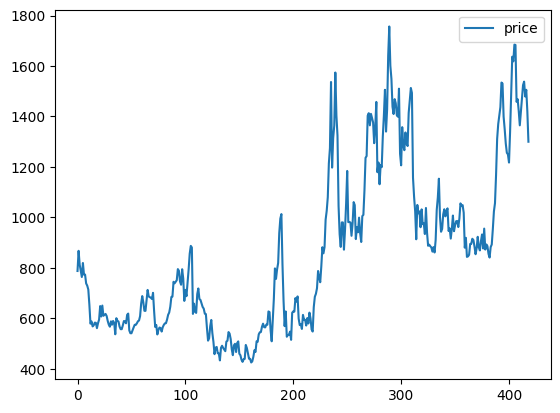

In [5]:
# PLOT PRICES

df.plot()

In [6]:
# PLOT STATIONARITY SERIES

prices_stationarity= df['price'].shift(12)

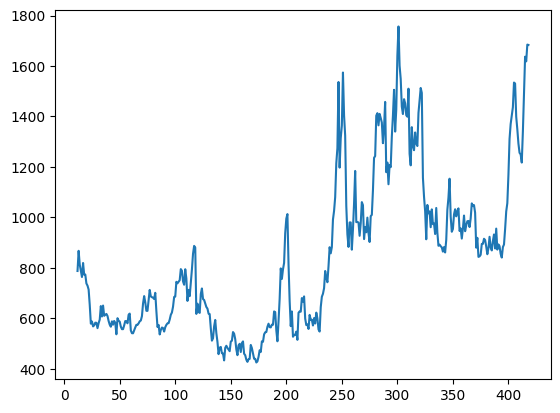

In [7]:
plt.plot(prices_stationarity)

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
# La serie no es estacionaria, dado que p-value es > a 0,05.-

adfuller(df['price'].values)[1]

0.28149955088912

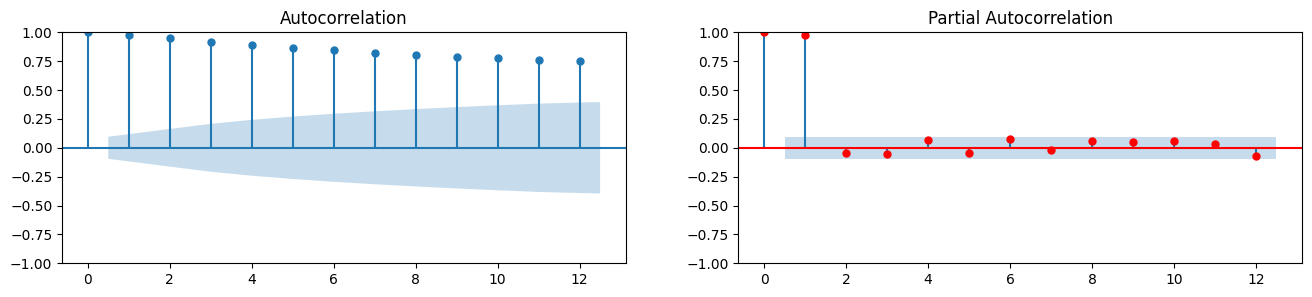

In [10]:
# PLOT AUTOCORRELATION (ACF) AND PARTIAL AUTOCORRELATION (PACF)

fig, axes = plt.subplots(1,2, figsize=(16,3))

plot_acf(df['price'].values, lags=12, ax=axes[0]);
plot_pacf(df['price'].values, lags=12, ax=axes[1], color='r');

***Predict NEXT datapoint (1-month horizon)***

***BASELINE*** 

We evaluate the baseline model with mean absolute percentage error (Metric of SKlearn)


In [11]:
y_pred_1 = df['price'].shift(1)

In [12]:
y_pred_1 = df['price'].shift(1).dropna()
y_true_1 = df['price'][1:]

print(f"MAPE: {mean_absolute_percentage_error(y_true_1, y_pred_1)}")

MAPE: 0.0518656833161911


In [13]:
y_pred_1[418]

1419.25

***BASELINE (T-3)*** 

In [14]:
y_pred_3 = df['price'].shift(3)

In [15]:
y_pred_3 = df['price'].shift(3).dropna()
y_true_3 = df['price'][3:]

print(f"MAPE: {mean_absolute_percentage_error(y_true_3, y_pred_3)}")

MAPE: 0.09243494585028682


***BASELINE (T-6)***

In [16]:
y_pred_3 = df['price'].shift(6)
y_pred_3 = df['price'].shift(6).dropna()
y_true_3 = df['price'][6:]

print(f"MAPE: {mean_absolute_percentage_error(y_true_3, y_pred_3)}")

MAPE: 0.12892170965245073


***Linear model with 12 autoregressive features***

In [17]:
df

,date,price
0,jul-88,787.50
1,ago-88,867.50
2,sep-88,813.00
3,oct-88,789.25
4,nov-88,763.75
...,...,...
414,ene-23,1538.00
415,feb-23,1479.00
416,mar-23,1505.50
417,abr-23,1419.25


In [18]:
# Let's keep the last 40% of the values out for testing purposes

train_size = 0.7
index = round(train_size*df.shape[0])

df_train = df.iloc[:294]
df_test = df.iloc[294:]

In [19]:
df2 = df.copy(); df2_train = df_train.copy(); df2_test = df_test.copy()

for i in range(1, 13):
    df2_train[f't - {i}'] = df_train['price'].shift(i)
    df2_test[f't - {i}'] = df_test['price'].shift(i)

df2_train.dropna(inplace=True)
df2_test.dropna(inplace=True)

df2_train.head()

,date,price,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
12,jul-89,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25,813.00,867.50,787.50
13,ago-89,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25,813.00,867.50
14,sep-89,568.00,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25,813.00
15,oct-89,572.25,568.00,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25
16,nov-89,582.75,572.25,568.00,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75


In [20]:
# Train Test Split
X2_train = df2_train.drop(columns = ['price','date'])
y2_train = df2_train['price']
X2_test = df2_test.drop(columns = ['price','date'])
y2_test = df2_test['price']

print(X2_train.shape,y2_train.shape, X2_test.shape,y2_test.shape)

(282, 12) (282,) (113, 12) (113,)


In [21]:
X2_train

,t - 1,t - 2,t - 3,t - 4,t - 5,t - 6,t - 7,t - 8,t - 9,t - 10,t - 11,t - 12
12,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25,813.00,867.50,787.50
13,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25,813.00,867.50
14,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25,813.00
15,568.00,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75,789.25
16,572.25,568.00,587.50,578.75,653.50,714.00,729.50,738.25,773.50,772.75,819.25,763.75
...,...,...,...,...,...,...,...,...,...,...,...,...
289,1641.00,1427.75,1340.00,1505.50,1403.00,1320.00,1199.00,1207.75,1131.25,1217.25,1179.00,1457.50
290,1756.50,1641.00,1427.75,1340.00,1505.50,1403.00,1320.00,1199.00,1207.75,1131.25,1217.25,1179.00
291,1601.00,1756.50,1641.00,1427.75,1340.00,1505.50,1403.00,1320.00,1199.00,1207.75,1131.25,1217.25
292,1548.75,1601.00,1756.50,1641.00,1427.75,1340.00,1505.50,1403.00,1320.00,1199.00,1207.75,1131.25


R2:  0.8964933549857523


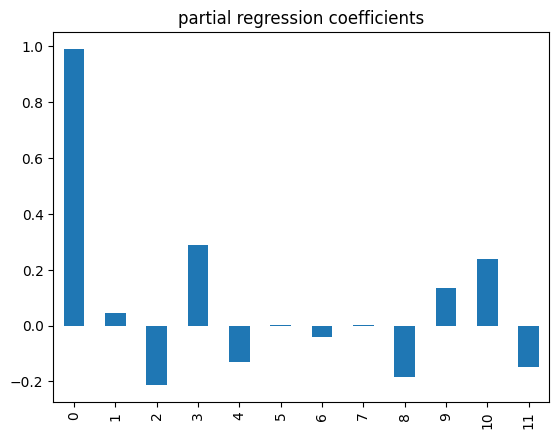

In [22]:
# Predict and measure R2

model = LinearRegression()
model = model.fit(X2_train, y2_train)

print('R2: ', r2_score(y2_test, model.predict(X2_test)))
pd.Series(model.coef_).plot(kind='bar')
plt.title('partial regression coefficients');

In [23]:
model.coef_

array([ 0.99190019,  0.04645029, -0.21189999,  0.28855521, -0.1307572 ,
        0.00300271, -0.03966094,  0.00345146, -0.18457621,  0.13539148,
        0.23730588, -0.14675802])

In [26]:
df_corn= pd.read_csv('raw_data/consolidado_soycorn.csv')
df_corn

,date,year month,price_soybean,Brazil-Tmin,Brazil-Tmax,Brazil-T mean,Brazil-Precipitation,ARGENTINA-Tmin,ARGENTINA-Tmax,ARGENTINA T Mean,...,SP500,VIX,price_wti_oil,price_corn,price_wheat,SOYBEANS - USA PRODUCTION [mTons],usa_corn_prod,SOYBEANS - Brazil PRODUCTION [mTons],SOYBEANS - Argentina PRODUCTION [mTons],SOYBEANS - USA Stocks [mTons]
0,7/1/1988,07-1988,787.50,16.0,26.1,21.05,30.0,3.0,14.2,8.60,...,441.0,25.36,14.21,217.25,252.5,42.153,181.143,23.600,9.9,"8,232"
1,8/1/1988,08-1988,867.50,17.6,28.8,23.20,34.0,6.8,17.3,12.05,...,474.9,25.36,14.21,217.25,252.5,42.153,181.143,23.600,9.9,"8,232"
2,9/1/1988,09-1988,813.00,19.6,30.4,25.00,92.0,5.4,18.1,11.75,...,511.5,25.36,14.21,217.25,252.5,42.153,181.143,23.600,9.9,"8,232"
3,10/3/1988,10-1988,789.25,21.2,30.2,25.70,151.0,8.7,21.9,15.30,...,532.5,25.36,14.21,217.25,252.5,42.153,181.143,23.600,9.9,"37,199"
4,11/1/1988,11-1988,763.75,21.2,29.2,25.20,173.0,11.7,27.0,19.35,...,558.5,25.36,14.21,217.25,252.5,42.153,181.143,23.600,9.9,"37,199"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,10/1/2023,10-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,122.740,348.751,NaN,NaN,NaN
424,11/1/2023,11-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,122.740,348.751,NaN,NaN,NaN
425,12/1/2023,12-2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,122.740,348.751,NaN,NaN,NaN
426,1/1/2024,01-2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_corn.columns

Index(['date', 'year month', 'price_soybean', 'Brazil-Tmin', 'Brazil-Tmax',
       'Brazil-T mean', 'Brazil-Precipitation', 'ARGENTINA-Tmin',
       'ARGENTINA-Tmax', 'ARGENTINA T Mean', 'ARGENTINA Precipitation',
       'Precipitation USA Decatur, IL (mm)',
       'Avg Temperature USA Decatur, IL (°C)', 'real_interest_rate',
       'exp_infl_1year', 'china_gdp_pp', 'eur_gdp_pp', 'usa_gdp_pp',
       'world_food_price_index', 'meat_price_index', 'DXY', 'price_gold',
       'SP500', 'VIX', 'price_wti_oil', 'price_corn', 'price_wheat',
       'SOYBEANS - USA PRODUCTION [mTons]', 'usa_corn_prod',
       'SOYBEANS - Brazil PRODUCTION [mTons]',
       'SOYBEANS - Argentina PRODUCTION [mTons]',
       'SOYBEANS - USA Stocks [mTons]'],
      dtype='object')

In [57]:
# BASELINE CORN MODEL HORIZON = 1 MONTH

In [65]:
df_baseline_corn=df_corn['price_corn'].dropna()

In [66]:
y_pred_1_corn = df_baseline_corn.shift(1).dropna()

In [67]:
y_true_1_corn = df_baseline_corn[1:].dropna()
print(f"MAPE: {mean_absolute_percentage_error(y_true_1_corn, y_pred_1_corn)}")

MAPE: 0.043349575835560455


In [68]:
## BASELINE CORN MODEL HORIZON = 3 MONTHS

In [69]:
y_pred_3_corn = df_baseline_corn.shift(3).dropna()
y_true_3_corn = df_baseline_corn[3:].dropna()
print(f"MAPE: {mean_absolute_percentage_error(y_true_3_corn, y_pred_3_corn)}")

MAPE: 0.07757303925443419


In [70]:
## BASELINE CORN MODEL HORIZON = 3 MONTHS


In [71]:
y_pred_6_corn = df_baseline_corn.shift(6).dropna()
y_true_6_corn = df_baseline_corn[6:].dropna()
print(f"MAPE: {mean_absolute_percentage_error(y_true_6_corn, y_pred_6_corn)}")

MAPE: 0.10624661787652416
